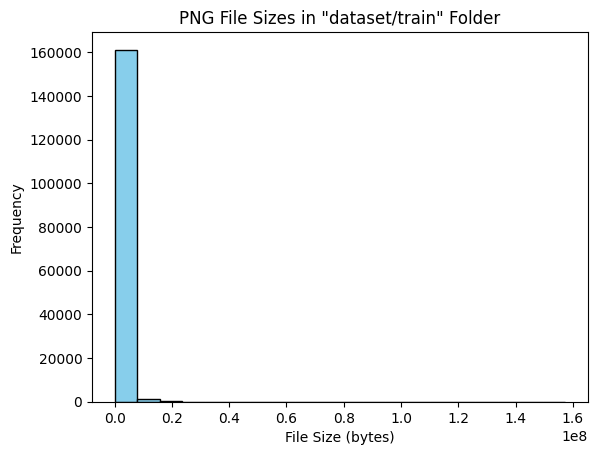

In [4]:
import os
import matplotlib.pyplot as plt

# 폴더 경로 설정
folder_path = 'dataset/train'

# 해당 폴더 내의 PNG 파일 용량을 저장할 리스트 생성
file_sizes = []

# 폴더 내의 파일들을 탐색하며 PNG 파일의 용량을 리스트에 추가
for file in os.listdir(folder_path):
    if file.endswith(".png"):
        file_path = os.path.join(folder_path, file)
        file_size = os.path.getsize(file_path)
        file_sizes.append((file,file_size))
file_sizes = dict(file_sizes)

# 파일 용량 데이터로 히스토그램 생성
plt.hist(file_sizes.values(), bins=20, color='skyblue', edgecolor='black')
plt.title('PNG File Sizes in "dataset/train" Folder')
plt.xlabel('File Size (bytes)')
plt.ylabel('Frequency')
plt.show()


In [6]:
to_remove = []
for k,v in file_sizes.items():
    if v > 0.5 * 1e8:
        print(k,v)
        to_remove.append(k)

013118.png 66866182
034632.png 123032436
000087.png 56446409
086335.png 56980278
207513.png 55661360
091085.png 95684350
032262.png 63833337
055197.png 66491200
118909.png 143026736
220541.png 157385208


In [8]:
# remove above files from dataset and metadata

import jsonlines 

with jsonlines.open('dataset/train/metadata.jsonl') as reader:
    metadata = list(reader)

metadata = {e["file_name"]:e for e in metadata}

In [9]:
for k in to_remove:
    del metadata[k]

In [10]:
metadata = list(metadata.values())

In [11]:
with jsonlines.open('dataset/train/metadata.jsonl', mode='w') as writer:
    writer.write_all(metadata)

In [12]:
metadata[0]

{'file_name': '000237.png',
 'caption': "here 's that motorcycle themed accent table that you 've been looking for ."}

In [13]:
# remove files
for k in to_remove:
    os.remove(os.path.join(folder_path, k))